<a href="https://colab.research.google.com/github/theayangupta/Price-Prediction-using-ML/blob/master/Real_Estate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the required modules and libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

from sklearn import ensemble
from sklearn import tree
from sklearn import metrics

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from lightgbm import LGBMRegressor

from tabulate import tabulate

import pydotplus
from IPython.display import Image
import seaborn as sb

In [ ]:
# Importing sklearn dataset
data = fetch_california_housing()
data

{'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block group\n        - HouseAge      median house age in block group\n        - AveRooms      average number of rooms per household\n        - AveBedrms     average number of bedrooms per household\n        - Population    block group population\n        - AveOccup      average number of household members\n        - Latitude      block group latitude\n        - Longitude     block group longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttps://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html\n\nThe target variable is the median house value for California districts,\nexpressed in hundreds of thousands of dollars

In [ ]:
# Creating pandas dataframe
boston = pd.DataFrame(data.data, columns=data.feature_names)
boston.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25


In [ ]:
#Printing target output
output = pd.DataFrame(data.target)
output.head(10)

,0
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
5,2.697
6,2.992
7,2.414
8,2.267
9,2.611


In [ ]:
boston.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [ ]:
# Correlation Matrix
boston.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000


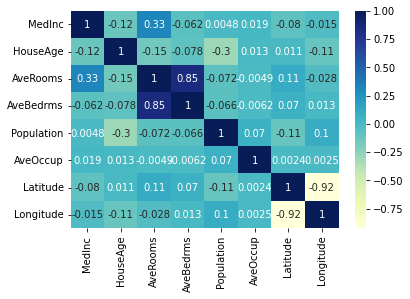

In [ ]:
# Correlation Heatmap
dataplot = sb.heatmap(boston.corr(), cmap="YlGnBu", annot=True)

plt.show()

In [ ]:
X = data.get('data')
Y = data.get('target')

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=5)

In [ ]:
clf = LinearRegression()
clf.fit(X_train, Y_train)

clf2 = tree.DecisionTreeRegressor(random_state = 0, min_samples_split = 150)
clf2.fit(X_train, Y_train)

clf3 = XGBRegressor(objective = 'reg:squarederror')
clf3.fit(X_train, Y_train)

clf4 = RandomForestRegressor()
clf4.fit(X_train, Y_train)

clf5 = LGBMRegressor()
clf5.fit(X_train, Y_train)

LGBMRegressor()

In [ ]:
Y1 = clf.predict(X_test)
Y2 = clf2.predict(X_test)
Y3 = clf3.predict(X_test)
Y4 = clf4.predict(X_test)
Y5 = clf5.predict(X_test)


In [ ]:
dot_data = tree.export_graphviz(clf2, out_file=None,
feature_names = data.feature_names, 
class_names = data.target_names
)

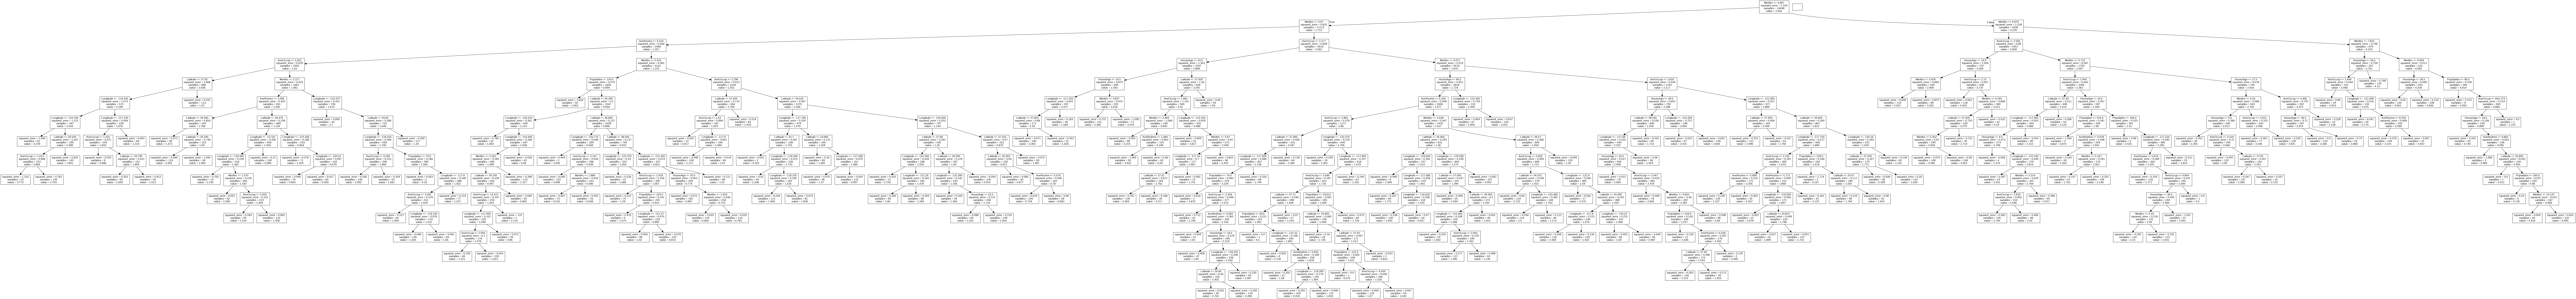

In [ ]:
graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png()) 	

In [ ]:
# Using metrics to measure accuracy
a1 = metrics.r2_score(Y_test, Y1)
a2 = metrics.mean_absolute_error(Y_test, Y1)
a3 = metrics.mean_squared_error(Y_test, Y1)
a4 = np.sqrt(metrics.mean_squared_error(Y_test, Y1))

b1 = metrics.r2_score(Y_test, Y2)
b2 = metrics.mean_absolute_error(Y_test, Y2)
b3 = metrics.mean_squared_error(Y_test, Y2)
b4 = np.sqrt(metrics.mean_squared_error(Y_test, Y2))

c1 = metrics.r2_score(Y_test, Y3)
c2 = metrics.mean_absolute_error(Y_test, Y3)
c3 = metrics.mean_squared_error(Y_test, Y3)
c4 = np.sqrt(metrics.mean_squared_error(Y_test, Y3))

d1 = metrics.r2_score(Y_test, Y4)
d2 = metrics.mean_absolute_error(Y_test, Y4)
d3 = metrics.mean_squared_error(Y_test, Y4)
d4 = np.sqrt(metrics.mean_squared_error(Y_test, Y4))

e1 = metrics.r2_score(Y_test, Y5)
e2 = metrics.mean_absolute_error(Y_test, Y5)
e3 = metrics.mean_squared_error(Y_test, Y5)
e4 = np.sqrt(metrics.mean_squared_error(Y_test, Y5))

In [ ]:
# Tabulating the result
table = [
    ["Linear Regression", a1, a2, a3, a4], 
    ["Decsion Tree Regressor", b1, b2, b3, b4],
    ["XGB Regressor", c1, c2, c3, c4],
    ["Random Forest Regressor", d1, d2, d3, d4],
    ["LGBM Regressor", e1, e2, e3, e4], 
]
 
head = ["Algorithm", "R2 Score", "Mean Absolute Error", "Mean Squared Error", "Root Mean Squared Error"]
 
print(tabulate(table, headers=head, tablefmt="grid"))

+-------------------------+------------+-----------------------+----------------------+---------------------------+
| Algorithm               |   R2 Score |   Mean Absolute Error |   Mean Squared Error |   Root Mean Squared Error |
+=========================+============+=======================+======================+===========================+
| Linear Regression       |   0.610564 |              0.533708 |             0.530862 |                  0.728602 |
+-------------------------+------------+-----------------------+----------------------+---------------------------+
| Decsion Tree Regressor  |   0.7036   |              0.434412 |             0.40404  |                  0.635641 |
+-------------------------+------------+-----------------------+----------------------+---------------------------+
| XGB Regressor           |   0.789729 |              0.367932 |             0.286633 |                  0.535381 |
+-------------------------+------------+-----------------------+--------